# Text Classification Project

## Submitted by: Hardik Garg as part of DS+ML course offered by CN

In [1]:
import numpy as np, pandas as pd
from sklearn import model_selection
import os, re
import time, operator
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Stage-1: Data Preprocessing

Here we organize the data into the traditional x,y and train,test arrays so that they can be fed to our algorithm

In [2]:
## stop_words list-1
## note: this one is very long and program will take too long to run hence this is not used

stop_words = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]

In [25]:
## stop_words list-2 
## note: this one is shorter and less accurate but runs fast. This is used

stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [26]:
## storing documents in x,y
x = []
y = []

## accessing directories and thus documents
for category in os.listdir("/home/hardeekh/Desktop/sublime/data science/Machine Learning/naive_bayes_project/20_newsgroups"):
    
    for document in os.listdir("/home/hardeekh/Desktop/sublime/data science/Machine Learning/naive_bayes_project/20_newsgroups/"+category):
        
        with open("/home/hardeekh/Desktop/sublime/data science/Machine Learning/naive_bayes_project/20_newsgroups/"+category+"/"+document, "r", encoding="ISO-8859-1") as file_obj:
            
            x.append([document, file_obj.read().lower()])
            y.append(category)
    

In [27]:
## doing a 3:1 train_test_split
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=0)

In [30]:
## creating word-freq dictionary, takes around 10 seconds to execute

## time module for calculating time
a=time.time()

## creating frequency dictionary
word_dict = {}

for string in x_train:
    
    ## using regex to extract individual words out of a long news article.
    words = re.findall("[a-z]+", string[1])
    
    for word in words:
        
        ## adding the word in dictionary if it is not a stop word and has length > 2
        if word not in stop_words and len(word) > 2:
            
            if word in word_dict:
                word_dict[word]+=1
                
            else:
                word_dict[word]=1
                
## sort the dictionary in descending order of frequency
sorted_word_dict = sorted(word_dict.items(), key=operator.itemgetter(1),reverse=True)

## sort frequency values

## array having only values
value_arr = [sorted_word_dict[i][1] for i in range(len(sorted_word_dict))]

## array having only keys. This serves as our vocabulary
vocab = [sorted_word_dict[i][0] for i in range(len(sorted_word_dict))]

print("The block executed in:",time.time()-a,"seconds")
print("total features / words:", len(vocab))

The block executed in: 9.69997239112854 seconds
total features / words: 106407


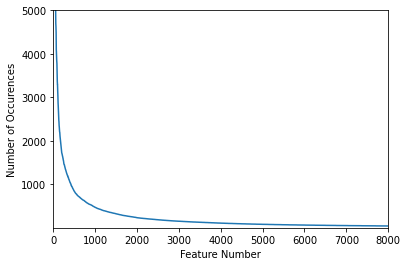

In [7]:
## plotting feature vs frequency graph

plot_x = np.array([i+1 for i in range(len(sorted_word_dict))])
plot_y = value_arr

plt.plot(plot_x, plot_y)
plt.axis([0,8000,1,5000])
plt.xlabel("Feature Number")
plt.ylabel("Number of Occurences")
plt.show()

In [31]:
## preparing datasets for x_train of the model

## this block takes aroudn 144 seconds to execute since the data has 2000 features, 15000 rows, 
## and each row is further tokenized into separate words
a = time.time()

## I am choosing the first 2000 features as beyond that there is no significant change in the accuracy
## of the model (found by trial-and-error)

num_features = 2000

## reducing vocabulary and other parameters to the first 2000 features
sorted_word_dict = sorted_word_dict[:num_features]
vocab = vocab[:num_features]
value_arr = value_arr[:num_features]

## initializing numpy arrays for the model which will eventually be passed
## these are 2D arrays having data-points as rows and each element of vocab array as a feature
## so we have 2000 features for this model
x_train_for_model = np.zeros((len(x_train), num_features))
x_test_for_model = np.zeros((len(x_test), num_features))

## populating x_train_for_model
for i in range(len(x_train)):
    
    ## tokenizing current word using regex
    words = re.findall("[a-z]+", x_train[i][1])
    
    ## iterating over separate words and adding them iff they belong to the vocab
    for word in words:
        
        if word in vocab:
            x_train_for_model[i][vocab.index(word)]+=1
    
print("The block executed in:",time.time()-a,"seconds")

103.1876893043518


In [32]:
## preparing datasets of the x_test of the model, proceeds exactly like previous block
## note that vocab was created using x_train only but now we process x_test according to that vocab only

## this block executes in around 30 seconds

a=time.time()

for i in range(len(x_test)):
    
    ## iterating over separate words and adding them iff they belong to the vocab
    
    words = re.findall("[a-z]+", x_test[i][1])
    
    for word in words:
        
        if word in vocab:
            
            x_test_for_model[i][vocab.index(word)]+=1
    
print("The block executed in:",time.time()-a,"seconds")    

The block executed in: 29.92203712463379 seconds


## Stage-2: Model using sklearn

Here we train the data on in-built multinomial naive bayes module and print its confusion matrix and classification report

In [33]:
clf1 = MultinomialNB()
clf1.fit(x_train_for_model, y_train)
y_pred = clf1.predict(x_test_for_model)

print("training score:",clf.score(x_train_for_model, y_train))
print("testing score:",clf.score(x_test_for_model, y_test))

training score: 0.8942455157698206
testing score: 0.8634


In [17]:
## analysis of model via various metrics

confusion_matrix_ = confusion_matrix(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(confusion_matrix_)
print(report)

[[200   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0  58]
 [  1 186   5   1   3  20   1   0   0   0   0   3   1   2   5   0   0   0
    1   1]
 [  0   6 188   7   1  22   0   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  13  18 201  20   5   3   0   0   0   0   0   4   1   0   0   1   0
    0   0]
 [  1  11   3  29 254   8   2   1   0   0   0   0   5   3   0   0   0   0
    0   0]
 [  0   4  16   2   0 167   0   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   7   7   4   5   3 236   6   2   2   1   2   1   4   0   0   0   3
    1   1]
 [  3   2   3   0   0   0   3 243   5   1   0   0   5   1   1   0   0   1
    1   0]
 [  1   1   0   1   0   1   0  12 226   2   0   0   1   3   1   0   1   1
    0   0]
 [  0   0   0   0   0   0   0   2   2 224  10   0   0   1   1   0   1   0
    0   0]
 [  0   0   0   0   0   0   0   0   0  19 229   0   0   1   1   0   0   0
    0   0]
 [  0   0   1   0   0   1   0   0   0   0   0 241   0   0   0   0

As we can see that our model has 0.86 accuracy on test data. The confusion matrix above also indicates that most of the data points are being classified correctly.

## Stage-3: Model using self-implemented algorithm

Here we train the data on self implemented multinomial naive bayes and print its confusion matrix and classification report

In [50]:
## class implementing multinomial_naive_bayes

class Multinomial_Naive_Bayes:
    
    def __init__(self):
        ## the main dictionary is a data member of our class
        self.result = {}
    
    ## this is exactly like what was done in the coding session by Ankush sir, so I believe this does not 
    ## require much explanation
    
    def fit(self, x, y):
        
        class_values = set(y)
        y=np.array(y)
        
        ## stores the total number of data points
        self.result["total_data"] = len(y)
        
        for current_class in class_values:
            
            self.result[current_class] = {}
            
            x_current = x[y==current_class]
            y_current = y[y==current_class]
            
            num_features = x.shape[1]
            
            ## stores the total number of data_points in current_class 
            self.result[current_class]["total_count"] = len(y_current)
            
            ## stores total word count for current_class
            temp=0
            for j in range(num_features):
            
                temp+=x_current[:,j].sum()
                self.result[current_class][j] = x_current[:,j].sum()
                
            ## stores total word count for current_class
            self.result[current_class]["word_in_class"]=temp
                
                
    def probability(self, data_point, current_class):
        
        ## this is for weighted addition of log probabilties 
        ## laplace correction is also implemented
        
        output = np.log(self.result[current_class]["total_count"])-np.log(self.result["total_data"])
        
        ## subtract 2 because of total_count and word_in_class
        num_features = len(self.result[current_class].keys())-2
        
        for j in range(num_features):
            
            ## value of feature j for current_class
            xj = data_point[j]
            
            if xj==0:
                continue
                
            ## numerator
            count_current_class_with_value_xj = self.result[current_class][j]+1
            
            ## denominator
            laplace = len(self.result[current_class].keys())-2
            count_current_class = self.result[current_class]["word_in_class"] + laplace
            
            current_xj_probability = np.log(count_current_class_with_value_xj) - np.log(count_current_class)
        
            output = output + current_xj_probability
            
        return output
        
        
    def predict_single_point(self, data_point):
        
        all_classes = self.result.keys()
        
        best_p = -float("inf")
        best_class = -1
        first_run = True
        
        for current_class in all_classes:
            
            if current_class == "total_data":
                continue
                
            p_current_class = self.probability(data_point, current_class)
            
            if first_run or p_current_class > best_p:
                best_p = p_current_class
                best_class = current_class
                
            first_run = False
            
        #print("iteration number:", self.counter,"took:", time.time()-a,"seconds")
        #self.counter+=1
        return best_class
        
    def predict(self, x):
        
        y_pred = []
        
        for data_point in x:
            
            data_point_class = self.predict_single_point(data_point)
            y_pred.append(data_point_class)
            
        return y_pred
                    
        

In [51]:
## function to find mean accuracy. This is written outside the class so that we can use it without 
## creating an object as well, for more efficient useage.

def score(y_pred, y_test):
    count=0
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            count+=1
    return count/len(y_pred)

In [52]:
## using self implemented model this time

clf2 = Multinomial_Naive_Bayes()
clf2.fit(x_train_for_model, y_train)

## uncomment to print main algo dictionary
##print(clf2.result)

In [62]:
## call prediction function. This function takes around 140 seconds as well (if we train only test data)
## training train data will take around 360 seconds or 6 minutes in my system.

a = time.time()

y_train_pred = clf2.predict(x_train_for_model)
y_test_pred = clf2.predict(x_test_for_model)

print("training score:",score(y_train_pred, y_train))
print("testing score:",score(y_test_pred, y_test))
print("The block executed in:",time.time()-a,"seconds")    

training score: 0.907381476295259
testing score: 0.8714
The block executed in: 358.9994761943817 seconds


In [63]:
## analysis of model via various metrics

confusion_matrix_ = confusion_matrix(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(confusion_matrix_)
print(report)

[[213   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  78]
 [  1 195  20   4   7  32   0   0   0   0   0   3   3   4   8   0   0   0
    1   2]
 [  0   3 172   2   0  17   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   8  21 209   8   2   3   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   9   5  28 260   6   4   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  10  18   1   2 175   0   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   1   5   3   5   0 228   7   3   2   2   1   0   1   1   0   0   2
    0   0]
 [  0   0   0   0   0   0   7 249   5   0   0   0   0   0   0   0   0   0
    1   0]
 [  1   0   0   0   0   0   0   7 228   1   1   0   0   1   1   0   1   0
    0   0]
 [  1   0   0   0   0   0   0   0   0 240   4   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   6 233   0   0   0   0   0   0   0
    0   0]
 [  0   0   2   0   0   0   0   0   0   0   0 241   0   0   0   0

As we can see that our model has 0.87 accuracy on test data. The confusion matrix above also indicates that most of the data points are being classified correctly.

## Comparison and Final Remarks

From the above analysis, the in-built model has an accuracy of 0.86 on the testing data whereas the accuracy increases to 0.87 when the self-implemented model is used. I believe this can be improved more if a more detailed list of stop-words is used. Based on these inferences, the self-implemented model works pretty well in comparison to the inbuilt one. For further comparison, confusion matrices and classification reports in each of the cases can be referred. One more noteworthy point is that the inbuilt algo takes comparatively much lesser time for predictions whereas self implemented model takes aroudn 6 minutes.

# Thank you :)